In [1]:
import pandas as pd
from pandas import DataFrame

In [2]:
# Chemin des fichier du portfolio pour activate et closed
csv_filename: str = "goPeer_Portfolio_September_10th_2024_activate.csv"

In [3]:
# Creation des dataframe pour les portfolio active et closed
df: DataFrame = pd.read_csv(csv_filename)

In [4]:
#nettyage du dataframe activate
df = df.drop(columns=["Purpose", "Return", "Next Payment", "Expected Maturity"])
df.head()

,Loan ID,Grade,Invested,Principal Outstanding,Total Earned,Status
0,676808,B+,$10.00,$8.38,$0.61,Good Standing
1,307425,A,$10.00,$0.00,$0.60,Repaid
2,186324,B+,$10.00,$9.12,$0.75,Good Standing
3,281363,B,$10.00,$8.28,$0.71,Good Standing
4,630711,B+,$10.00,$9.05,$0.78,Good Standing


In [5]:
df["Grade"] = df["Grade"].astype(str)
df['Invested'] = pd.to_numeric(df['Invested'].replace('[\$,]', '', regex=True))
df['Principal Outstanding'] = pd.to_numeric(df['Principal Outstanding'].replace('[\$,]', '', regex=True))
df['Total Earned'] = pd.to_numeric(df['Total Earned'].replace('[\$,]', '', regex=True))

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Mayemba-Mosesi Bamba\AppData\Local\Temp\ipykernel_16312\1410801418.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Invested'] = pd.to_numeric(df['Invested'].replace('[\$,]', '', regex=True))
C:\Users\Mayemba-Mosesi Bamba\AppData\Local\Temp\ipykernel_16312\1410801418.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Principal Outstanding'] = pd.to_numeric(df['Principal Outstanding'].replace('[\$,]', '', regex=True))
C:\Users\Mayemba-Mosesi Bamba\AppData\Local\Temp\ipykernel_16312\1410801418.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Total Earned'] = pd.to_numeric(df['Total Earned'].replace('[\$,]', '', regex=True))


In [6]:
status_mapping = {
    "In Grace Period": 0,
    'Good Standing': 1,
    'Repaid': 2,
    "Structured":3,
    "Late (16-30 days)":4,
    "Delinquent (30-60 days)":5,
    "Delinquent (90-120 days)":6,
    "In Default (121+ days)":7,
    "Charged Off":8
}

df['Status Numeric'] = df['Status'].map(status_mapping)

In [8]:
df['Return on Investment'] = df['Total Earned'] / df['Invested']

In [21]:
grouped = df.groupby('Grade').agg({
    'Invested': 'mean',
    'Principal Outstanding': 'mean',
    'Total Earned': 'mean',
    "Return on Investment": "mean",
    'Status Numeric': 'mean',
    
})

grouped

,Invested,Principal Outstanding,Total Earned,Return on Investment,Status Numeric
Grade,,,,,
A,13.333333,2.406667,1.280000,0.091667,1.333333
A-,19.545455,9.642500,2.432273,0.103386,1.340909
B,27.631579,10.206579,4.014342,0.123564,1.447368
B+,21.875000,12.254250,2.946875,0.116736,1.512500
B-,22.549020,11.527745,4.065980,0.151905,1.637255
C,33.469388,14.630204,7.366735,0.194291,1.875000
C+,25.428571,12.524571,4.594000,0.156537,1.857143
C-,44.444444,16.642500,7.498889,0.158117,2.916667
D,10.000000,9.920000,0.600000,0.060000,8.000000


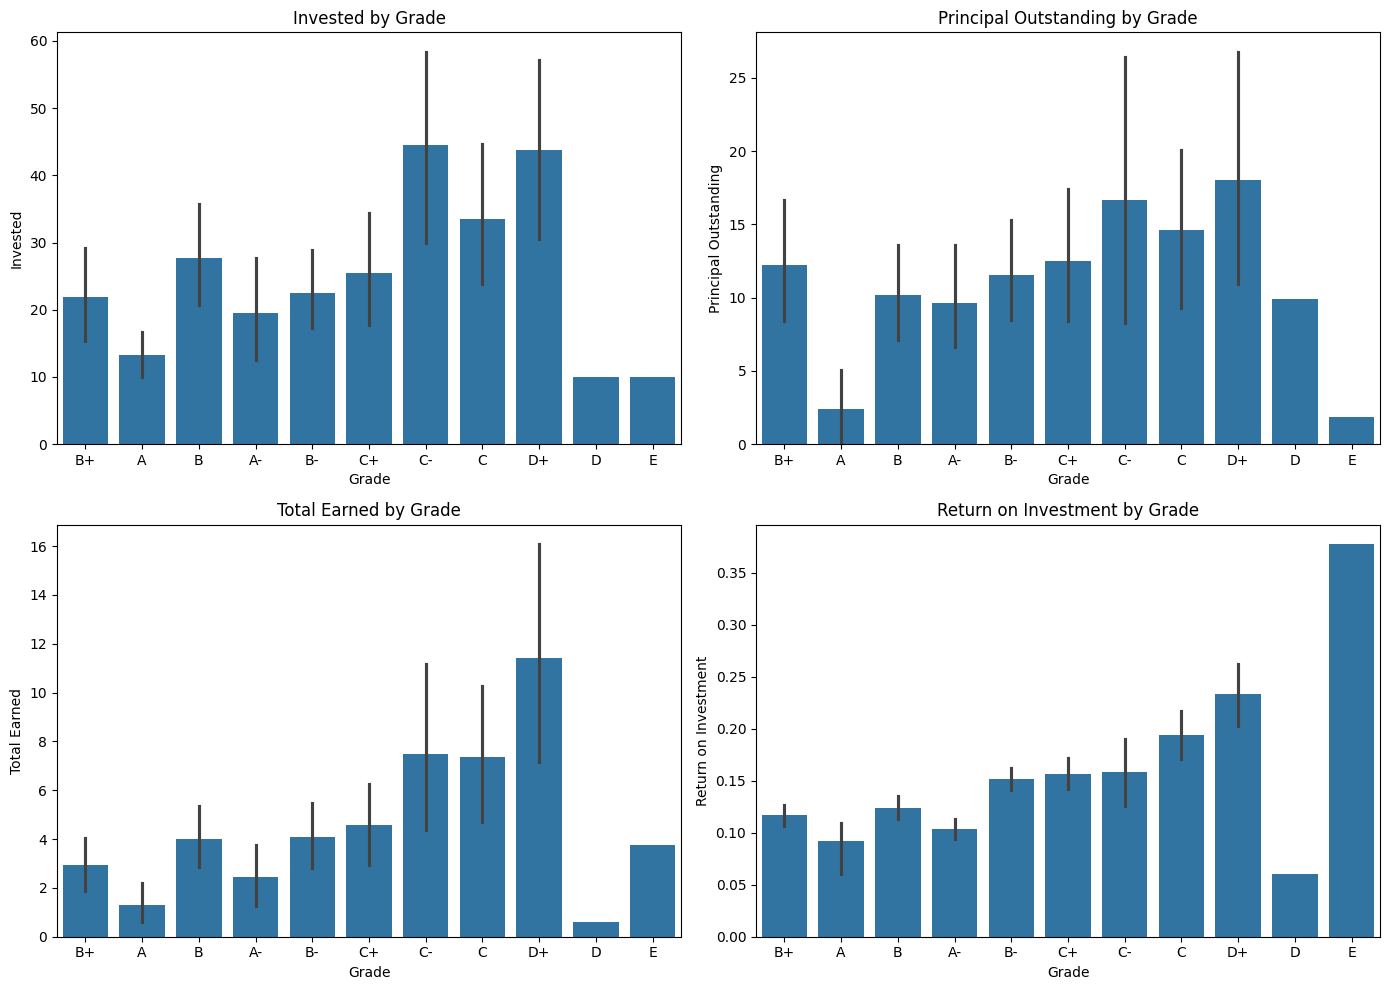

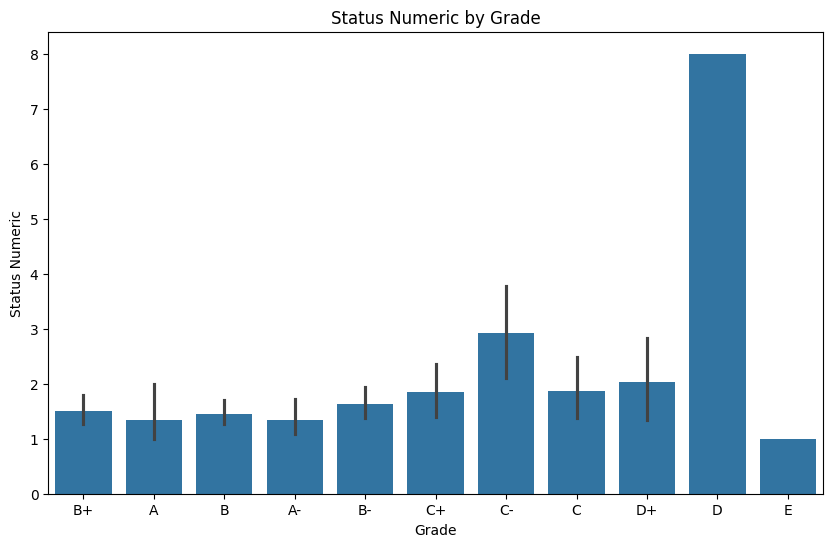

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des distributions par grade
plt.figure(figsize=(14, 10))

# Invested
plt.subplot(2, 2, 1)
sns.barplot(x='Grade', y='Invested', data=df)
plt.title('Invested by Grade')

# Principal Outstanding
plt.subplot(2, 2, 2)
sns.barplot(x='Grade', y='Principal Outstanding', data=df)
plt.title('Principal Outstanding by Grade')

# Total Earned
plt.subplot(2, 2, 3)
sns.barplot(x='Grade', y='Total Earned', data=df)
plt.title('Total Earned by Grade')

# Return on Investment
plt.subplot(2, 2, 4)
sns.barplot(x='Grade', y='Return on Investment', data=df)
plt.title('Return on Investment by Grade')

plt.tight_layout()
plt.show()

# Visualisation de l'écart-type par grade
plt.figure(figsize=(10, 6))
sns.barplot(x='Grade', y='Status Numeric', data=df)
plt.title('Status Numeric by Grade')
plt.show()

